In [5]:
import math
import numpy as np
import pandas as pd

#import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [7]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [57]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Training',
    target_size=(48, 48),
    batch_size=64,
    class_mode='binary')


val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'Validation',
    target_size=(48, 48),
    batch_size=64,
    class_mode='binary')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


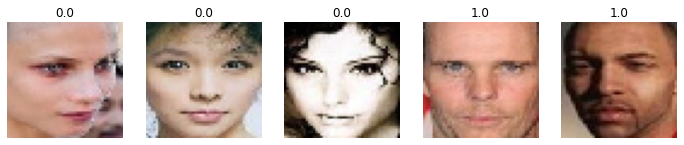

(48, 48, 3)

In [51]:
import matplotlib.pyplot as plt

batch = train_generator.next()

images = batch[0]
labels = batch[1]

fig, axes = plt.subplots(1, 5, figsize=(12, 8))
axes = axes.ravel()

for i in range(5):
    axes[i].imshow(images[i])
    axes[i].set_title(labels[i])
    axes[i].axis('off')

plt.show()
images[i].shape

In [56]:
model = Sequential()

model.add(Conv2D(32, (1, 1), activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 48, 48, 32)        128       
                                                                 
 conv2d_67 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 batch_normalization_33 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_68 (Conv2D)          (None, 21, 21, 32)      

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint('gender_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history = model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator,
    callbacks=[checkpoint])

Epoch 1/3
735/735 [==============================] - ETA: 0s - loss: 0.3136 - accuracy: 0.8647
Epoch 1: val_loss improved from inf to 0.18601, saving model to gender_model.h5
735/735 [==============================] - 173s 232ms/step - loss: 0.3136 - accuracy: 0.8647 - val_loss: 0.1860 - val_accuracy: 0.9252
Epoch 2/3
735/735 [==============================] - ETA: 0s - loss: 0.1987 - accuracy: 0.9231
Epoch 2: val_loss improved from 0.18601 to 0.17245, saving model to gender_model.h5
735/735 [==============================] - 159s 216ms/step - loss: 0.1987 - accuracy: 0.9231 - val_loss: 0.1724 - val_accuracy: 0.9370
Epoch 3/3
735/735 [==============================] - ETA: 0s - loss: 0.1691 - accuracy: 0.9357
Epoch 3: val_loss did not improve from 0.17245
735/735 [==============================] - 164s 223ms/step - loss: 0.1691 - accuracy: 0.9357 - val_loss: 0.1924 - val_accuracy: 0.9248
